Problem --

Using iris data cluster the iris flowers into different clusters based on similarity

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
#load the data
data = pd.read_csv('/content/Iris (1).csv')

In [6]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [7]:
# dropping the col Unnamed: 0
data.drop('Unnamed: 0',axis=1,inplace = True)

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
#Basic checks

data.shape

(150, 5)

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [13]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
data.duplicated().sum()

3

In [17]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [18]:
#analsying the target column

data.target.unique()

array([0, 1, 2])

In [19]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<Axes: xlabel='petal_length', ylabel='petal_width'>

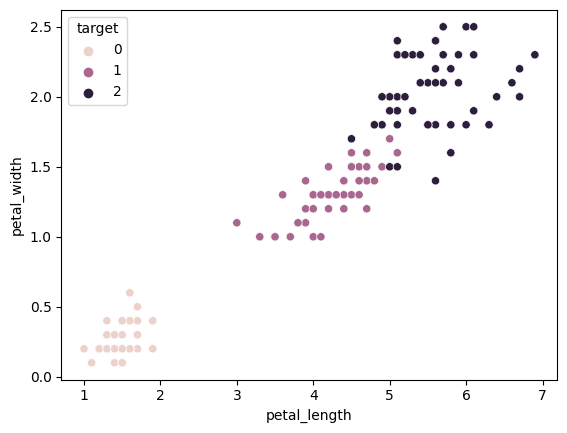

In [20]:
#EDA

sns.scatterplot(data=data, x = 'petal_length',y = 'petal_width',hue = 'target')

In [21]:
#data preprocessing

#missing values

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [22]:
#duplicates
data.duplicated().sum()


3

<Axes: >

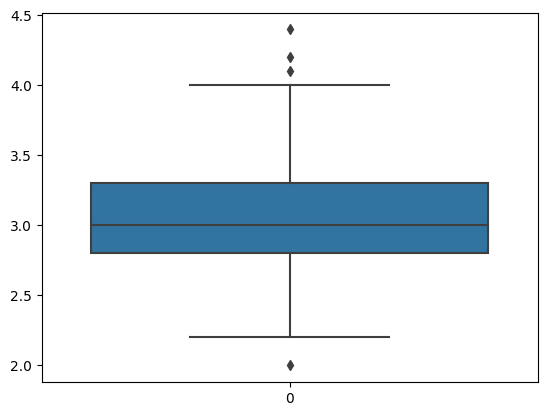

In [23]:
#outliers

#handling outliers is also important

sns.boxplot(data['sepal_width'])

<Axes: xlabel='sepal_width', ylabel='Count'>

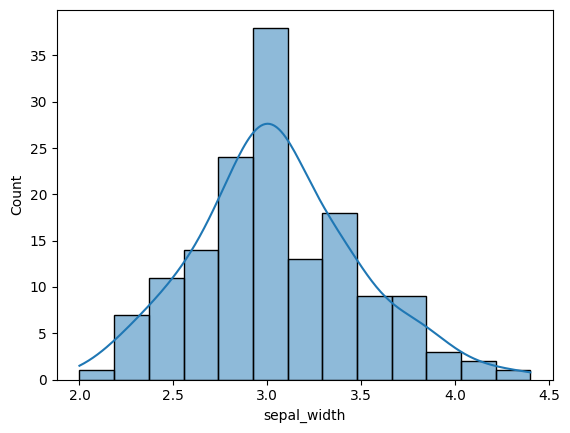

In [24]:
#distribution

sns.histplot(x = data['sepal_width'],kde =True)

In [ ]:
#outliers are there, and the col shows normal dis
#since the dis is normal we are going with 3 sigma

#lower_limit = mean - 3 * sigma

#upper_limit = mean + 3 * sigma

In [27]:
lower_limit = data['sepal_width'].mean() - 3 * data['sepal_width'].std()
upper_limit = data['sepal_width'].mean() + 3 * data['sepal_width'].std()
print('lower limit ',lower_limit)
print('upper limit ',upper_limit)

lower limit  1.7532170659134791
upper limit  4.354782934086521


In [28]:
#find the values less than lower limit

data.loc[data['sepal_width'] < lower_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [29]:
#find the values greater than upper limit
data.loc[data['sepal_width'] > upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [31]:
#find the percentage of outliers
(len(data.loc[data['sepal_width']>upper_limit])/len(data))*100


0.6666666666666667

In [32]:
(len(data.loc[data['sepal_width']>upper_limit])/len(data))*100


0.6666666666666667

In [34]:
#replace the outlier with mean

data.loc[data['sepal_width']>upper_limit,'sepal_width']= data['sepal_width'].mean()

In [38]:
#scaling

#applying Standard scaler

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]= scaling.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [39]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,2
146,0.553333,-1.304384,0.705893,0.922064,2
147,0.795669,-0.107760,0.819624,1.053537,2
148,0.432165,0.849539,0.933356,1.447956,2
